## Final Project Submission

Please fill out:
* Student name: **WARUCHU KURIA**
* Student pace: self paced / part time / full time - **PART TIME**
* Scheduled project review date/time: **16/04/2023**
* Instructor name: **DIANA MONGINA / NOAH KANDIE**
* Blog post URL:

![img](images/cinema-popcorn-ticket-movie-theatre-png-27.png)

# MICROSOFT MOVIES - CAN IT HAPPEN?

Microsoft wants to start creating original video content. The purpose of this exploring various public movie datasets that contain information on films in the box office. This will then be used to provide insight on the viability of the project for Microsoft, i.e. what the company should consider before embarking on the project.
The datasets used in this analysis are:
1. [Box Office Mojo](https://www.boxofficemojo.com/)
2. [TheMovieDB](https://www.themoviedb.org/)
3. [IMDb](https://www.imdb.com/)

# Business Problem
The issues to be looked into are:
1. What are the top grossing movies? The details will guide Microsoft on movie types to emulate.
2. What is the performance of movies by genre - number of movies, gross income, ratings? This will inform on the genres worth investing in.
3. How useful is the performance of a studio in terms of gross income? Microsoft may look into engaging the studios/directors for the content creation.

# Data Understanding

### [1. Box Office Mojo Dataset](https://www.boxofficemojo.com/)

- This dataset is a CSV file that has information on how much gross income the movies earned in the domestic and foreign markets.
- The data is significant to determine the investment returns per movie over the years.

### [2. The Movie Database Dataset](https://www.themoviedb.org/)
- Information at a glance is the movie title, genre (ID), language, release date and votes received for each movie. 
- This dataset would be good to gauge the performance of films in the box office, hence, deciding on, for instance, the most popular genres.

### [3. The IMDb Dataset](https://www.imdb.com/)
- This dataset has several CSV files.
- The files of interest will be imdb.title.basics.csv.gz (genre information and reviews) and imdb.title.ratings.csv.gz

## Importing necesssary modules
- Creating an alias for the modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sqlite3

## Preparing the Data
- The next step is adding the datasets and explore them in order to decide on the information to use for the analysis.
- The files are added using the `pd.read` function relevant to the file type. 
- A dataframe is created to hold the dataset and make the information readable by Pandas.

### Box Office Mojo Dataset

In [2]:
mojo_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# displaying a summary of the datafarame created
# showing the datatypes, number of columns and rows, null values

mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


- `title` is the name of the movie.
- `studio` - the production house.
- `foreign_gross` and `domestic_gross` - income in home market and international market.
- `year` - the year the movie was released.
- There are missing values in the ``studio``, ``domestic_gross`` and ``foreign_gross`` columns. 
- ``foreign_gross`` is a `str`, should be `int`.

#### a. Dealing with Missing Data

In [4]:
# counting the missing data

mojo_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

- ``foreign_gross`` has the largest number of null values. However, this column is important due to its financial aspect that is a basis for this analysis. The same applies to `domestic_gross` column.
- The `studio` column has few missing data. The affected rows can be removed since their effect will be insignificant to the overall data. The column will be retained as it may come in handy as the analysis progresses.

**`studio` Column - drop rows**

In [5]:
# checking weight in percentage of the missing data in studio column
mojo_df["studio"].isnull().mean() * 100

0.14762326542663123

In [6]:
# dropping rows with missing values from the `studio` column

mojo_df.dropna(subset=["studio"], axis=0, inplace=True)
mojo_df["studio"].isnull().sum()

0

**`foreign_gross` Column - replace missing values with 0 to show no foreign income**

In [7]:
mojo_df["foreign_gross"].tail(20)

3367    NaN
3368    NaN
3369    NaN
3370    NaN
3371    NaN
3372    NaN
3373    NaN
3374    NaN
3375    NaN
3376    NaN
3377    NaN
3378    NaN
3379    NaN
3380    NaN
3381    NaN
3382    NaN
3383    NaN
3384    NaN
3385    NaN
3386    NaN
Name: foreign_gross, dtype: object

In [8]:
mojo_df["foreign_gross"].fillna(0, inplace=True)
mojo_df["foreign_gross"].tail(20)

3367    0
3368    0
3369    0
3370    0
3371    0
3372    0
3373    0
3374    0
3375    0
3376    0
3377    0
3378    0
3379    0
3380    0
3381    0
3382    0
3383    0
3384    0
3385    0
3386    0
Name: foreign_gross, dtype: object

**`domestic_gross` Column - replace missing values with 0 to show no foreign income**

In [9]:
mojo_df["domestic_gross"].fillna(0, inplace=True)
mojo_df["domestic_gross"].iloc[926:966]

928          0.0
929    2600000.0
930    4300000.0
931    1000000.0
932    4099999.0
934    4000000.0
935    3400000.0
936          0.0
937     355000.0
938     354000.0
939      23400.0
940    3700000.0
941    2000000.0
942      75700.0
943    3300000.0
944    3100000.0
945    3100000.0
946    3000000.0
947      69100.0
948    2900000.0
949    2800000.0
950     192000.0
951    2700000.0
952     151000.0
953    2600000.0
954    2500000.0
955    1500000.0
956    2400000.0
957    2300000.0
958     351000.0
959     304000.0
960    2000000.0
961     898000.0
962    2000000.0
963       3500.0
964    1900000.0
965    1800000.0
966          0.0
967      11000.0
968     138000.0
Name: domestic_gross, dtype: float64

In [10]:
mojo_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### b. Changing dtype of `foreign_gross` column
- This is to enable calculation of income.

In [11]:
mojo_df["foreign_gross"] = pd.to_numeric(mojo_df["foreign_gross"], errors="coerce")
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3377 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


The change affected the `foreign_gross` column by creating NaN values.

In [12]:
# displaying the affected rows

fg_missing = mojo_df[mojo_df["foreign_gross"].isna()]
fg_missing

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,NaN,2015
1873,Jurassic World,Uni.,652300000.0,NaN,2015
1874,Furious 7,Uni.,353000000.0,NaN,2015
2760,The Fate of the Furious,Uni.,226000000.0,NaN,2017
3079,Avengers: Infinity War,BV,678800000.0,NaN,2018


These are movies that showed in many countries globally and will definitely have some foreign income. The 5 rows cannot be dropped.
The current figures as per the dataset's website [Box Office Mojo](https://www.boxofficemojo.com/) are as follows:

|**Movie Name**|**Foreign Gross**|
|---|---|
|Star Wars: The Force Awakens|1,134,647,993|
|Jurassic World|1,018,130,819|
|Furious 7|1,162,334,379|
|The Fate of the Furious|1,009,996,733|
|Avengers: Infinity War|1,373,599,557|

The code below will replace the missing values with the correct figures.

In [13]:
# creating the new figures to replace NaN
fg_missing_dict = {"Star Wars: The Force Awakens": 1134647993,
                   "Jurassic World": 1018130819, 
                   "Furious 7": 1162334379, 
                   "The Fate of the Furious": 1009996733, 
                   "Avengers: Infinity War": 1373599557}

In [14]:
# use a for loop to update the values
# it assigns the key to the title and the value to the figure
# locate the key and value in the DataFrame
for index, (key, value) in enumerate(fg_missing_dict.items()):
     mojo_df.loc[mojo_df.title == key, 'foreign_gross'] = value

In [15]:
# testing the changes
mojo_df[mojo_df['title'] == "Furious 7"]

,title,studio,domestic_gross,foreign_gross,year
1874,Furious 7,Uni.,353000000.0,1.162334e+09,2015


In [16]:
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [17]:
mojo_df.iloc[1868:1873]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1.134648e+09,2015
1873,Jurassic World,Uni.,652300000.0,1.018131e+09,2015
1874,Furious 7,Uni.,353000000.0,1.162334e+09,2015
1875,Avengers: Age of Ultron,BV,459000000.0,9.464000e+08,2015
1876,Minions,Uni.,336000000.0,8.234000e+08,2015


In [18]:
# converting foreign_gross to int64 for readability

mojo_df["foreign_gross"] = mojo_df["foreign_gross"].astype("int64")
mojo_df.iloc[1868:1873]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1134647993,2015
1873,Jurassic World,Uni.,652300000.0,1018130819,2015
1874,Furious 7,Uni.,353000000.0,1162334379,2015
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
1876,Minions,Uni.,336000000.0,823400000,2015


In [19]:
# create new column `gross_income`

mojo_df["gross_income"] = mojo_df["domestic_gross"] + mojo_df["foreign_gross"]
mojo_df

,title,studio,domestic_gross,foreign_gross,year,gross_income
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0,2018,2.400000e+03


In [20]:
# convert new column "gross_income" to int64

mojo_df["gross_income"] = mojo_df["gross_income"].astype("int64")
mojo_df

,title,studio,domestic_gross,foreign_gross,year,gross_income
0,Toy Story 3,BV,415000000.0,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,960300000
3,Inception,WB,292600000.0,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,752600000
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018,6200
3383,Edward II (2018 re-release),FM,4800.0,0,2018,4800
3384,El Pacto,Sony,2500.0,0,2018,2500
3385,The Swan,Synergetic,2400.0,0,2018,2400


#### Selecting columns to keep

In [21]:
mojo_df = mojo_df[["title", "studio", "gross_income"]]
mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3382 non-null   object
 1   studio        3382 non-null   object
 2   gross_income  3382 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 105.7+ KB


### The Movie Database Dataset

In [22]:
# reading the csv file and showing the first five rows

moviedb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col = 0)
moviedb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
# displaying a summary of the datafarame created
# showing the datatypes, number of columns and rows, null values

moviedb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


- There are no missing values in this dataset.
- `genre_ids` are lists of integers. There is need to find out what each integer represents. The column is important to query by genre. Otherwise, it can be dropped if a more suitable column is found in the other databases.

In [24]:
moviedb_df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

#### Selecting columns to keep

In [25]:
moviedb_df = moviedb_df[['title', 'vote_average']]
moviedb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         26517 non-null  object 
 1   vote_average  26517 non-null  float64
dtypes: float64(1), object(1)
memory usage: 621.5+ KB


### The IMDb Dataset

#### Connecting the database

In [26]:
conn = sqlite3.connect("zippedData/im.db")
cur = conn.cursor()
tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table';", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


The dataset has 8 tables. 
For this analysis, the `movie_basics` and `movie_ratings` tables will be used.
They will then be joined using the `movie_id` column as it is common to both.

In [27]:
# creating df from movie_basics table
imdb_moviebasics_df = pd.read_sql("SELECT * FROM movie_basics", conn)
imdb_moviebasics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [28]:
imdb_moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [29]:
# creating df from movie_ratings table
imdb_movieratings_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
imdb_movieratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [30]:
imdb_movieratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [31]:
# creating one IMDb df
# it requires converting the intended index column, movie_id to int64 in both df

imdb_moviebasics_df['movie_id'] = imdb_moviebasics_df['movie_id'].str[2:].astype('int64')
imdb_movieratings_df['movie_id'] = imdb_movieratings_df['movie_id'].str[2:].astype('int64')

imdb_df = imdb_moviebasics_df.join(imdb_movieratings_df.set_index('movie_id'), on='movie_id', how='inner')

imdb_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,63540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,66787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,69049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,69204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
146115,9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
146122,9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
146125,9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
146129,9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Next, columns to be dropped are as follows:
1. `original_title` - it has missing values. `primary_title` should suffice. Also, as per the [IMDb site ](https://help.imdb.com/article/contribution/titles/alternate-titles-akas/GBFBWTQG2RLMHSUR?ref_=helpsect_pro_4_8#), "The primary title should be the original title, in the original language". This seems more appropriate.
2. `runtime_minutes` - not required
3. `numvotes` - not required

In [32]:
imdb_df = imdb_df.drop(["original_title", "runtime_minutes", "numvotes"], axis=1)
imdb_df.columns

Index(['movie_id', 'primary_title', 'start_year', 'genres', 'averagerating'], dtype='object')

In [33]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  int64  
 1   primary_title  73856 non-null  object 
 2   start_year     73856 non-null  int64  
 3   genres         73052 non-null  object 
 4   averagerating  73856 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


Work on the missing values in `genres` column by deleting the affected rows.
The justification for this is that since such significant information is missing from the titles, the movies may not be very popular. Thus, their influence on the decison-making is minimal.

In [34]:
# rename primary_title column to tile

imdb_df.rename(columns = {'primary_title':'title'}, inplace = True)
imdb_df.columns

Index(['movie_id', 'title', 'start_year', 'genres', 'averagerating'], dtype='object')

#### Selecting columns to keep

In [35]:
imdb_df = imdb_df[["title", "start_year", "genres", "averagerating"]]
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          73856 non-null  object 
 1   start_year     73856 non-null  int64  
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB


## Creating one DataFrame

In [36]:
movies = imdb_df.merge(moviedb_df, on = "title").merge(mojo_df, on = "title")
movies

,title,start_year,genres,averagerating,vote_average,studio,gross_income
0,Wazir,2016,"Action,Crime,Drama",7.1,6.6,Relbig.,1100000
1,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,IFC,8744000
2,On the Road,2014,Drama,6.0,5.6,IFC,8744000
3,On the Road,2016,Drama,5.7,5.6,IFC,8744000
4,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,7.1,Fox,188100000
...,...,...,...,...,...,...,...
3292,Nobody's Fool,2018,"Comedy,Drama,Romance",4.6,5.9,Par.,33500000
3293,Capernaum,2018,Drama,8.5,8.4,SPC,1700000
3294,The Spy Gone North,2018,Drama,7.2,7.3,CJ,501000
3295,How Long Will I Love U,2018,Romance,6.5,7.4,WGUSA,82847000


In [37]:
movies.columns = movies.columns.str.title()
movies.columns

Index(['Title', 'Start_Year', 'Genres', 'Averagerating', 'Vote_Average',
       'Studio', 'Gross_Income'],
      dtype='object')

In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          3297 non-null   object 
 1   Start_Year     3297 non-null   int64  
 2   Genres         3288 non-null   object 
 3   Averagerating  3297 non-null   float64
 4   Vote_Average   3297 non-null   float64
 5   Studio         3297 non-null   object 
 6   Gross_Income   3297 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 206.1+ KB


The `Genres` column has missing values.
- Action - drop rows without a genre

In [39]:
movies = movies.dropna(subset=["Genres"])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 0 to 3296
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          3288 non-null   object 
 1   Start_Year     3288 non-null   int64  
 2   Genres         3288 non-null   object 
 3   Averagerating  3288 non-null   float64
 4   Vote_Average   3288 non-null   float64
 5   Studio         3288 non-null   object 
 6   Gross_Income   3288 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 205.5+ KB


## Adding some needed columns

- Splitting the str list from the Genres column
- New column Genre created

In [40]:
movies = movies.assign(Genre = movies["Genres"].str.split(',')).explode("Genre")
movies.head()

,Title,Start_Year,Genres,Averagerating,Vote_Average,Studio,Gross_Income,Genre
0,Wazir,2016,"Action,Crime,Drama",7.1,6.6,Relbig.,1100000,Action
0,Wazir,2016,"Action,Crime,Drama",7.1,6.6,Relbig.,1100000,Crime
0,Wazir,2016,"Action,Crime,Drama",7.1,6.6,Relbig.,1100000,Drama
1,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,IFC,8744000,Adventure
1,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,IFC,8744000,Drama


- Combine the `Averagerating` and	`Vote_Average` columns by getting their average.
- Create a new column `Rating` for this

In [41]:
movies["Rating"] = (movies["Averagerating"] + movies["Vote_Average"]) / 2
movies.head()

,Title,Start_Year,Genres,Averagerating,Vote_Average,Studio,Gross_Income,Genre,Rating
0,Wazir,2016,"Action,Crime,Drama",7.1,6.6,Relbig.,1100000,Action,6.85
0,Wazir,2016,"Action,Crime,Drama",7.1,6.6,Relbig.,1100000,Crime,6.85
0,Wazir,2016,"Action,Crime,Drama",7.1,6.6,Relbig.,1100000,Drama,6.85
1,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,IFC,8744000,Adventure,5.85
1,On the Road,2012,"Adventure,Drama,Romance",6.1,5.6,IFC,8744000,Drama,5.85


## Data Analysis, Visualization and Evaluation

### 1. Top grossing movies

####  Calculating the total gross for each film

In [42]:
top_grossing_movies = movies.sort_values(by = "Gross_Income", ascending=False).head(20)
print(top_grossing_movies[["Title", "Gross_Income"]])

                         Title  Gross_Income
2878    Avengers: Infinity War    2052399557
2878    Avengers: Infinity War    2052399557
2878    Avengers: Infinity War    2052399557
6               Jurassic World    1670430819
6               Jurassic World    1670430819
6               Jurassic World    1670430819
2421                 Furious 7    1515334379
2421                 Furious 7    1515334379
2421                 Furious 7    1515334379
2198   Avengers: Age of Ultron    1405400000
2198   Avengers: Age of Ultron    1405400000
2198   Avengers: Age of Ultron    1405400000
1546             Black Panther    1347000000
1545             Black Panther    1347000000
1545             Black Panther    1347000000
1545             Black Panther    1347000000
1546             Black Panther    1347000000
1546             Black Panther    1347000000
2280  Star Wars: The Last Jedi    1332600000
2281  Star Wars: The Last Jedi    1332600000


In [43]:
top_grossing_movies.iloc[0]

Title             Avengers: Infinity War
Start_Year                          2018
Genres           Action,Adventure,Sci-Fi
Averagerating                        8.5
Vote_Average                         8.3
Studio                                BV
Gross_Income                  2052399557
Genre                             Sci-Fi
Rating                               8.4
Name: 2878, dtype: object

In [44]:
top_grossing_movies.iloc[-1]

Title            Star Wars: The Last Jedi
Start_Year                           2017
Genres           Action,Adventure,Fantasy
Averagerating                         7.1
Vote_Average                            7
Studio                                 BV
Gross_Income                   1332600000
Genre                              Action
Rating                               7.05
Name: 2281, dtype: object

- **Avengers: Infinity War** grossed the highest income as per the dataset. It is categorised under the Action, Adventure and Sci-Fi genres. The income grossed to USD 2,052,399,557.
- **Captain America: Civil War** grossed the least amount (USD 1,153,300,000). It is listed in genres similar to **Avengers: Infinity War**, i.e. Action, Adventure and Sci-Fi.

In [45]:
# descriptive statistics of the top grossing movies
top_grossing_movies.describe()

,Start_Year,Averagerating,Vote_Average,Gross_Income,Rating
count,20.000000,20.000000,20.000000,2.000000e+01,20.000000
mean,2016.550000,7.400000,7.000000,1.533895e+09,7.200000
std,1.468081,0.486664,0.956969,2.516944e+08,0.646855
min,2015.000000,7.000000,5.100000,1.332600e+09,6.200000
25%,2015.000000,7.175000,6.600000,1.347000e+09,6.800000
50%,2017.000000,7.300000,7.300000,1.405400e+09,7.250000
75%,2018.000000,7.300000,7.400000,1.670431e+09,7.350000
max,2018.000000,8.500000,8.300000,2.052400e+09,8.400000


#### A table showing the top 20 movies by gross income

In [46]:
# check if indices is unique
top_grossing_movies.index.is_unique

False

In [47]:
# reset the index

top_grossing_movies.reset_index(inplace=True)

In [61]:
movie_table = top_grossing_movies.style \
    .background_gradient(cmap='Blues') \
    .highlight_max(color='grey') \
    .set_properties(**{'text-align': 'center'}) \
    .set_caption('Top Grossing Movies') \
    .hide_index()

movie_table

index,Title,Start_Year,Genres,Averagerating,Vote_Average,Studio,Gross_Income,Genre,Rating
2878,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.500000,8.300000,BV,2052399557,Sci-Fi,8.400000
2878,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.500000,8.300000,BV,2052399557,Adventure,8.400000
2878,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.500000,8.300000,BV,2052399557,Action,8.400000
6,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.000000,6.600000,Uni.,1670430819,Action,6.800000
6,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.000000,6.600000,Uni.,1670430819,Sci-Fi,6.800000
6,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.000000,6.600000,Uni.,1670430819,Adventure,6.800000
2421,Furious 7,2015,"Action,Crime,Thriller",7.200000,7.300000,Uni.,1515334379,Thriller,7.250000
2421,Furious 7,2015,"Action,Crime,Thriller",7.200000,7.300000,Uni.,1515334379,Action,7.250000
2421,Furious 7,2015,"Action,Crime,Thriller",7.200000,7.300000,Uni.,1515334379,Crime,7.250000
2198,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.300000,7.300000,BV,1405400000,Adventure,7.300000


### 2. Genres 

#### Grossing by Genre

In [49]:
genres = movies["Genre"].unique()
print(len(genres))
print(genres)

22
['Action' 'Crime' 'Drama' 'Adventure' 'Romance' 'Comedy' 'Sci-Fi' 'Family'
 'Animation' 'Thriller' 'Mystery' 'Biography' 'History' 'Horror'
 'Documentary' 'News' 'Fantasy' 'Sport' 'Music' 'War' 'Western' 'Musical']


In [50]:
genres_gross = movies.groupby("Genre").sum()

genres_gross = genres_gross.sort_values("Gross_Income", ascending=False)

# top 10 genres by total gross income
print(genres_gross[["Gross_Income"]].head(10))

           Gross_Income
Genre                  
Adventure  143670938466
Action     127283946877
Comedy      88691389688
Drama       87810409077
Sci-Fi      47043902975
Animation   46947384893
Thriller    44937123006
Fantasy     33911124099
Crime       26657144911
Horror      21079949700


#### Plot the graph

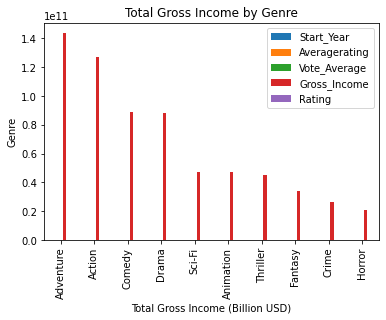

In [51]:
genres_gross.head(10).plot(kind='bar')
plt.xlabel('Total Gross Income (Billion USD)')
plt.ylabel('Genre')
plt.title('Total Gross Income by Genre')

plt.legend()
plt.show()

There are 22 different genres represented in this dataset.
The higest grossing genre is Adventure, followed by Action and Comedy.
This information is important as it will highlight the most profitable genres in the industry.

#### How many movies per genre?

In [52]:
movies_per_genre = movies.groupby("Genre").size()
movies_per_genre.sort_values(ascending=False)

Genre
Drama          1937
Comedy          958
Action          661
Thriller        539
Adventure       491
Romance         481
Crime           433
Biography       329
Horror          315
Mystery         243
Documentary     231
Fantasy         194
Sci-Fi          160
Animation       158
History         149
Family          124
Music           103
Sport            65
War              46
Western          22
Musical          15
News              4
dtype: int64

Most movies are in the Drama genre while the News genre has the least number of movies.
As such, Microsoft may concentrate on more Drama, Comedy, Action, Thriller and Adventure video content for a start as they explore the option of adding the rest for variety.

#### Genres with the highest ratings

In [53]:
movies["Rating"].value_counts()

6.90    209
6.35    200
6.85    190
6.10    180
6.65    180
       ... 
3.70      1
3.85      1
7.65      1
2.95      1
9.00      1
Name: Rating, Length: 156, dtype: int64

#### Count movies with a rating above 5

In [54]:
rating = movies.groupby("Genre").Rating.agg(["count","mean"]).sort_values(
    'mean', ascending = False)
rating[rating["count"]>=5]

,count,mean
Genre,,
Documentary,231,7.031602
Biography,329,6.886474
War,46,6.805435
History,149,6.801678
Animation,158,6.731646
Music,103,6.673301
Sport,65,6.536923
Western,22,6.531818
Drama,1937,6.524574


#### Visualizing the data

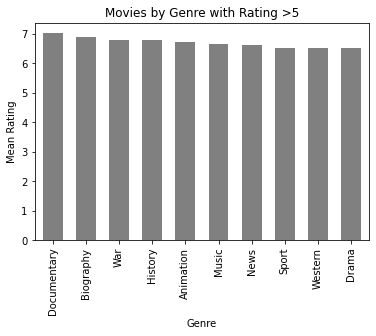

In [55]:
ax = rating['mean'].head(10).plot(kind='bar', color='grey', width=0.6)


plt.title("Movies by Genre with Rating >5")
plt.xlabel("Genre")
plt.ylabel("Mean Rating")


# customizing the bar width and color
ax.patch.set_facecolor('white')


plt.show()

### 3. Studio Income

#### Getting the studio information and returning gross earnings per studio

In [56]:
# gross_per_studio = total gross_income for each studio

gross_per_studio = movies.groupby(["Studio"]).sum()

gross_per_studio = gross_per_studio.sort_values("Gross_Income", ascending=False)

# top 5 studios by total gross income
print(gross_per_studio[["Gross_Income"]].head())

        Gross_Income
Studio              
BV      169852320670
Uni.    117146994792
Fox      96791511789
WB       82858930996
Sony     59531904493


In [57]:
gross_per_studio = gross_per_studio.reset_index()
gross_per_studio

,Studio,Start_Year,Averagerating,Vote_Average,Gross_Income,Rating
0,BV,630366,2190.9,2126.3,169852320670,2158.60
1,Uni.,1091697,3328.9,3316.9,117146994792,3322.90
2,Fox,805626,2577.8,2530.9,96791511789,2554.35
3,WB,729070,2388.0,2351.5,82858930996,2369.75
4,Sony,485345,1494.4,1468.7,59531904493,1481.55
...,...,...,...,...,...,...
184,ICir,2011,7.5,6.6,29300,7.05
185,ALP,12078,40.5,36.6,16800,38.55
186,TAFC,6042,19.5,20.4,13800,19.95
187,KS,4026,13.2,14.2,11800,13.70


In [58]:
print(gross_per_studio[["Studio", "Gross_Income"]].head())

  Studio  Gross_Income
0     BV  169852320670
1   Uni.  117146994792
2    Fox   96791511789
3     WB   82858930996
4   Sony   59531904493


#### Plotting the bar chart to show the top 5 studios

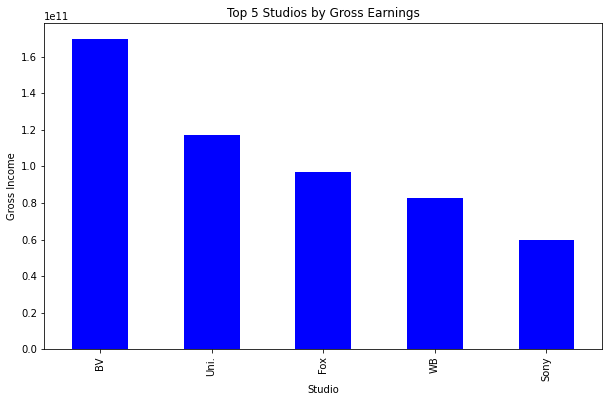

In [59]:
gross_per_studio.head().plot(kind="bar", x="Studio", y="Gross_Income", 
                      figsize=(10,6), legend=None, color="blue")

# set the labels and title of the plot
plt.xlabel("Studio")
plt.ylabel("Gross Income")
plt.title('Top 5 Studios by Gross Earnings')

# show the plot
plt.show()

The information showing income by studio will guide Microsoft on studios to engage/emulate. In this case, BV, Uni, Fox, WB and Sony seem to be doing well. The studio names in full are:
1. BV - Buena Vista
2. Uni - Universal Pictures
3. Fox - Fox Studios
4. WB - Warner Brothers
5. Sony - Sony Pictures

# Evaluation

Below are the highlights from this analysis
- **1. The top grossing movie is an Action, Adventure and Sci-fi movie.**
    - This is a pointer that movies in these genres are likely to do well in the industry.
    
- **2. The genres with the highest grossing are Adventure, Action and Comedy.**
    - It may be good business to build a foundation with these genres in the content creation business.
    
- **3. Most movies produced were in the Drama, Comedy and Action genres.**
    - There are three decision-guiders: 
        a. That the genres are cheaper and faster to produce
        b. That there higher returns on investment from these genres
        c. There is more demand for these genres than most other genres.
        
- **4. Documentaries, Biography and War movies had the highest ratings on average.** It may mean one of two things - the fans are more responsive and/or the production quality standards are high.

- **5. Buena Vista, Universal Pictures and Fox Studios grossed the highest income of all the studios represented in the datasets.** 
    - Engaging the skillsets in these studios is important to ensure quality production.
    - Emulating the culture of the studios in the content creation business will be good practice for the business.

# Conclusion and Recommendations

- There is need to conduct further analysis using **more recent data (2018 to date)** to provide updated information.
- In the setting up of the studio, Microsoft may also look into **modern-day content** such as social media content, live streaming, 3-D and 4-D, etc. This will place them on a better playing ground with more established studios.